In [1]:
# Physics 411 Assignment #1 notebook for questions 3 + 4:

# import libraries:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from scipy.stats import norm
import datetime 
import matplotlib.dates as mdates

In [2]:
G = 6.67259 * 10**(-12)
MS = 1.989e+33
MH = 1.6735575 * 10**(-24)
Kb = 1.3807 * 10**(-16)
T = 10**9

R = (G*MH*MS)/(3*Kb*T)

print(R)

53622.77464190103


### Question 3: Monte Carlo Simulation of Central Limit Theorem ###

1.  * Generate a random process with a uniform probability distribution between 0 and 1. (In
Matlab this is accomplished with the rand.m function, not randn.m. In Python use
numpy.random.Generator.random). Use enough data points that its PDF, when
plotted looks as you would expect. Subtract the mean of 0.5 from all the numbers

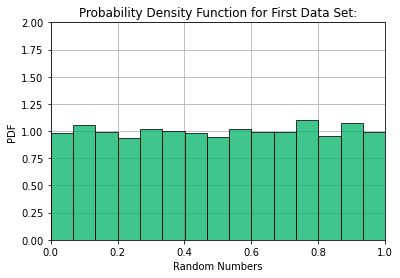

In [3]:
# first need to create a uniform probability distribution 
# between 0 and 1:

# number of data points:
kk = 10000

# generator method for random numbers:
rng = np.random.default_rng()

# using a number of data points equal to kk:
uni_dist_1 = rng.random((kk,))

# plots the above set of data points as histogram to confirm that it looks as desired:


plt.rc('axes', axisbelow=True)
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
n, bins, patches = plt.hist(uni_dist_1, 15, density=True, facecolor=[0,0.7,0.4], alpha=0.75, edgecolor='k')
plt.xlabel('Random Numbers')
plt.ylabel('PDF')
plt.title('Probability Density Function for First Data Set:')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.grid(which='both')
plt.show()

# subtracts the mean from all of the numbers:

uni_dist_1 = uni_dist_1 - 0.5


* Generate a second uniform random process with the same number of data points and
add it to the first. Divide the result by sqrt(2) to normalize the extra variance. Replot
the PDF.

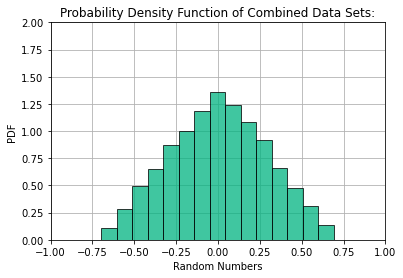

In [4]:
# generates a second uniform distribution with the same number of data points:

uni_dist_2 = rng.random((kk,)) - 0.5

# combines two distributions:
combine_dist_12 = (uni_dist_1+uni_dist_2)  / np.sqrt(2)     #[*uni_dist_1, *uni_dist_2] to intersect

# plots new distribution:
ff = plt.figure()
ff.set_figwidth(6)
ff.set_figheight(4)
plt.hist(combine_dist_12, 15, density=True, facecolor=[0.0,0.7,0.5], alpha=0.75, edgecolor='k')
plt.xlabel('Random Numbers')
plt.ylabel('PDF')
plt.title('Probability Density Function of Combined Data Sets:')
plt.xlim(-1, 1)
plt.ylim(0, 2)
plt.grid(which='both')
plt.show()


* Do this 4 times (normalizing each time). Use subplots to get several plots on 1 page.
Do the resulting PDFs start to look Gaussian? Give a brief theoretical explanation for
this behaviour?

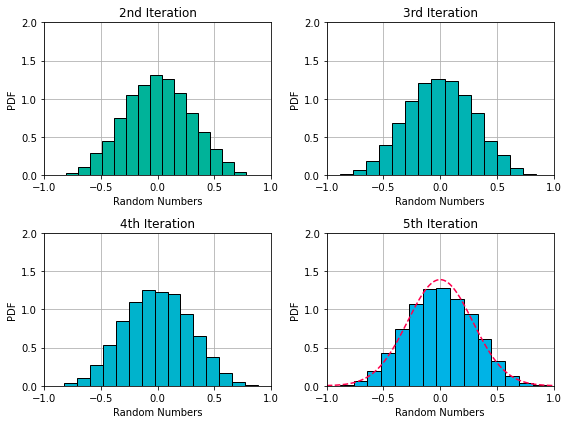

In [5]:
# must now repeat the above procedure 4 times:

# Creates the four iterated data sets:

def combination_func(dist):
    
    # creates new random distribution:
    uni_dist = rng.random((kk,)) - 0.5
    
    # adds inputted distribution with new one and divides by root(2):
    combined_dist = (dist+uni_dist)/np.sqrt(2)
    
    return combined_dist

# makes four combined distribution with increasing number of samples:

combine_dist_3 = combination_func(combine_dist_12)
combine_dist_4 = combination_func(combine_dist_3)
combine_dist_5 = combination_func(combine_dist_4)
combine_dist_6 = combination_func(combine_dist_5)

# plots each combined distribution in a subplot:

ff, axs = plt.subplots(2, 2)
ff.set_figwidth(8)
ff.set_figheight(6)
titles = ["2nd Iteration", "3rd Iteration", "4th Iteration", "5th Iteration"] 
data = [combine_dist_3,combine_dist_4,combine_dist_5,combine_dist_6]

# gaussian fit to last set:
(mu, sigma) = norm.fit(combine_dist_6)
xx = np.linspace(-1, 1, 400)
aa = axs.ravel()
for idx,ax in enumerate(aa):
    ax.hist(data[idx], 15, density=True, edgecolor="k", facecolor=[0.0,0.7 ,0.6 + idx*0.1])
    ax.set_title(titles[idx])
    ax.set_xlabel("Random Numbers")
    ax.set_ylabel("PDF")
    ax.grid(True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 2)
    if idx ==3:
        plt.plot(xx, norm.pdf(xx, mu, sigma), "--", color=[1,0,0.3])
plt.tight_layout()


#### Explanation: ####

The Central Limit Theorem tells us that if we have a population of mean $\mu$ and standard deviation $\sigma$, and then we take an adequate amount of independent samples from this population, each with their own unique probability distribution, and add them, the resulting total distribution will tend towards a Gaussian. In this example, all of the random samples have the same mean of 0.5 and should have similar standard deviations since, with a sufficient number of data points used, all of the random variable distributions should resemble a uniform probability distribution from 0 to 1. Combining the above statement with the Central Limit Theorem tells us that with enough iterations of this random distribution process we should approach a Normal distribution. As can be seen above, by the fifth iteration it follows a Gaussian quite nicely. 


### Question 4. Comparison of minute-resolution and hourly-resolution data ###

This is mainly to get you started on accessing the project data and understanding how to analyze
data using your software package.
A description of the data, file format etc is given on Brightspace under “Course Project”.
You’ll have “temperature” data and “pressure” data for several locations. Here, use only data for
the Station ‘UVic Sci’ (48.462oN, 236.691oE). Data files are provided on Brightspace. The data
files “All hourly pressure data 2022” and “All hourly temperature data 2022” contain data for
all stations, and data for the Station “UVicSci” have to be extracted from this file (column 15).
Minute-resolution data are for single stations only (The file “Minute resolution data 2022” must
be un-zipped after downloading. Then use file ‘UVicSci Tp.dat’).

   1. For the temperature data sets (01/01/2016 to 30/07/2022):
      * Plot the time series of the hourly and minute data in 2 different panels, on the same
          plot (use ‘subplot’).
      * Compare sample mean and sample standard deviations for the two resolutions.
      * Plot approximate pdf’s (i.e. from histograms)
      * Add an appropriate normal distribution to th eplot of the approximate pdf’s .

In [6]:
# first need to read in the data files:

hourly_temp =np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_temperature_hourly.dat").T
hourly_pressure = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVic_weatherdata_pressure_hourly.dat").T
minute_uvic_data = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/UVicSci_Tp.dat").T


In [8]:
# organize the data:

uvic_ht = hourly_temp[14]
uvic_hp = hourly_pressure[14]
uvic_mt = minute_uvic_data[0]
uvic_mp = minute_uvic_data[1]

# clean up header data:

uvic_ht = uvic_ht[3:]
uvic_hp = uvic_hp[3:]
uvic_mt = uvic_mt[2:]
uvic_mp = uvic_mp[2:]

In [9]:
# now need to deal with the time axis:

minutes = np.linspace(1.451e+9+691200 ,  1.451e+9 + 207705513.6 +691200, 3461760 )
dates=[datetime.datetime.fromtimestamp(i).strftime("%d/%m/%Y" ) for i in minutes]

In [10]:
# array of stripped date values:
dates_st = [datetime.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
dates_hrly = dates_st[::60]

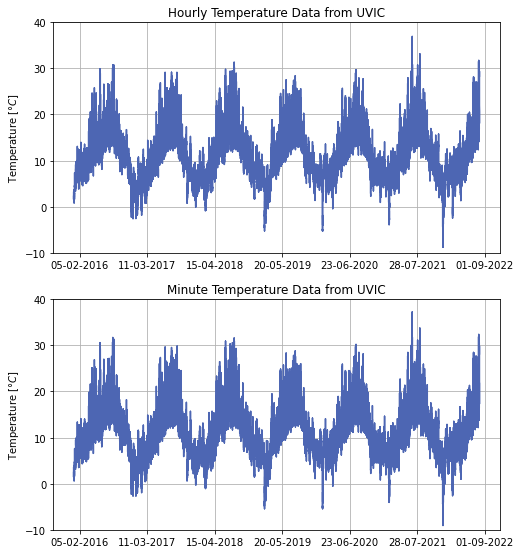

In [11]:
# plots the hourly and minute time series for temperature:

#initializes figure and axes:

ff, (ax2,ax1) = plt.subplots(2, 1)
ff.set_figwidth(8)
ff.set_figheight(6)


# plots the minute data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=400))
ax1.plot(dates_st,uvic_mt, color=[0.3,0.4,0.7])
ax1.set_title("Minute Temperature Data from UVIC")
#ax1.set_xlabel("Random Numbers")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.set_ylim(-10, 40)
ax1.grid(True)

# plots the hourly data:
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=400))
ax2.plot(dates_hrly,uvic_ht, color=[0.3,0.4,0.7])
ax2.set_title("Hourly Temperature Data from UVIC")
#ax2.set_xlabel("Random Numbers")
ax2.set_ylabel(r"Temperature [$\degree C$]" )
ax2.set_ylim(-10, 40)
ax2.grid(True)

plt.subplots_adjust(top=1.3)



The above plots look relatively the same from a glance. Both are periodic with each passing year as one would expect but still vary significantly from day to day. With more data points, the minute data appears fuller as expected. Further, near the fringes the hourly data seems to have more stand alone spikes in temperature. It is also interesting that almost every year contains one drop in temperature for a short period of time that sticks out. This is reflective of my last few years in Victoria. Similarly, the large spike in the summer of 2021 sticks out as a not so fun time. 

In [12]:
# now need to compare sample means and standard deviations of the two data sets:

# means:

mean_hourly_temp = np.mean(uvic_ht)
mean_minute_temp = np.mean(uvic_mt)

print("The hourly temperature mean is:", f"{mean_hourly_temp:.4f}", "\u00b0C")
print("The minute temperature mean is:", f"{mean_minute_temp:.4f}", "\u00b0C")

# now sample standard deviations:

std_hourly_temp = np.std(uvic_ht)
std_minute_temp = np.std(uvic_mt)

print()
print("The standard deviation of the hourly data is:", f"{std_hourly_temp:.4f}", "\u00b0C")
print("The standard deviation of the minute data is:", f"{std_minute_temp:.4f}", "\u00b0C")

The hourly temperature mean is: 11.3063 °C
The minute temperature mean is: 11.3063 °C

The standard deviation of the hourly data is: 5.6722 °C
The standard deviation of the minute data is: 5.6797 °C


The average means are identical which makes a decent amount of sense as temperature changes in a day are largely on the hourly scale rather than the minute. The standard deviation is larger for minute data which surprises me.

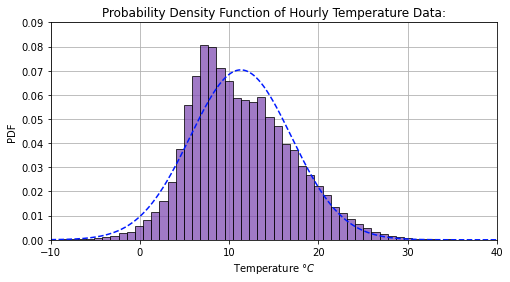

In [14]:
# now need to plot an approximate PDF for both:

# for hourly data:

ff = plt.figure()
ff.set_figwidth(8)
ff.set_figheight(4)
plt.hist(uvic_ht, 50, density=True, facecolor=[0.5,0.3,0.7], alpha=0.75, edgecolor='k')
plt.xlabel(r'Temperature $\degree C$')
plt.ylabel('PDF')
plt.title('Probability Density Function of Hourly Temperature Data:')
plt.xlim(-10, 40)
plt.ylim(0, 0.09)
plt.grid(which='both')
# normal distribution fit:
(mu, sigma) = norm.fit(uvic_ht)
xx = np.linspace(-10, 40, len(uvic_ht))
plt.plot(xx, norm.pdf(xx, mu, sigma), "--", color=[0,0.1,1])
plt.show()


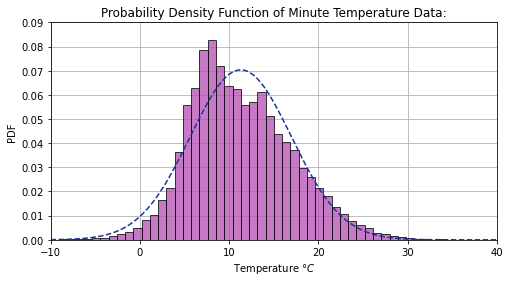

In [15]:
# for minutely data:
ff = plt.figure()
ff.set_figwidth(8)
ff.set_figheight(4)
plt.hist(uvic_mt, 50, density=True, facecolor=[0.7,0.3,0.7], alpha=0.75, edgecolor='k')
plt.xlabel(r'Temperature $\degree C$')
plt.ylabel('PDF')
plt.title('Probability Density Function of Minute Temperature Data:')
plt.xlim(-10, 40)
plt.ylim(0, 0.09)
plt.grid(which='both')
# normal distribution fit:
(mu, sigma) = norm.fit(uvic_ht)
xx = np.linspace(-10, 40, len(uvic_mt))
plt.plot(xx, norm.pdf(xx, mu, sigma), "--", color=[0.1,0.2,0.6])
plt.show()


Both of these distributions look relatively the same as well.  What is interesting is that neither follow a Gaussian completely but are rather rightly-skewed. This suggests to me that the prevalence of cold temperature days occurs noticeably less likely than warm days but with the caveat that most of the days fall under a temperature range of about 5-12 degrees. This coincides very well with what it is like to live in Victoria. 

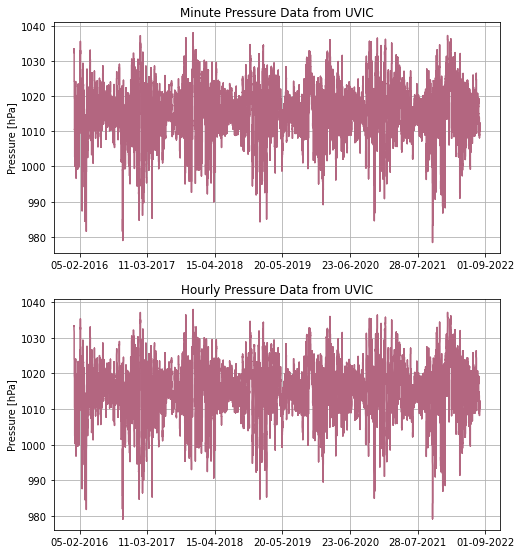

In [16]:
# plots the hourly and minute time series for pressure:

#initializes figure and axes:

ff, (ax1,ax2) = plt.subplots(2, 1)
ff.set_figwidth(8)
ff.set_figheight(6)


# plots the minute data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=400))
ax1.plot(dates_st,uvic_mp, color=[0.7,0.4,0.5])
ax1.set_title("Minute Pressure Data from UVIC")
#ax1.set_xlabel("Random Numbers")
ax1.set_ylabel(r"Pressure [hPa]" )
ax1.grid(True)

# plots the hourly data:
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=400))
ax2.plot(dates_hrly,uvic_hp, color=[0.7,0.4,0.5])
ax2.set_title("Hourly Pressure Data from UVIC")
ax2.set_ylabel(r"Pressure [hPa]" )
#ax2.set_ylim(-10, 40)
ax2.grid(True)

plt.subplots_adjust(top=1.3)

These plots are a little more interesting than the temperature plots. They still exhibit periodicity from year to year but with periodic variability rather than periodic values. It seems that in the summer months, the pressure variations become smaller and somewhats stabilize, while in the winter months, the changes in pressure from high to low occur much more frequently, almost creating what looks like a randomly distributed beat frequency.

In [17]:
# now need to compare sample means and standard deviations of the two data sets:

# means:

mean_hourly_pres = np.mean(uvic_hp)
mean_minute_pres = np.mean(uvic_mp)

print("The hourly pressure mean is:", f"{mean_hourly_pres:.4f}", "hPa")
print("The minute pressure mean is:", f"{mean_minute_pres:.4f}", "hPa")

# now sample standard deviations:

std_hourly_pres = np.std(uvic_hp)
std_minute_pres = np.std(uvic_mp)

print()
print("The standard deviation of the hourly data is:", f"{std_hourly_pres:.4f}", "hPa")#, "\u00b0C")
print("The standard deviation of the minute data is:", f"{std_minute_pres:.4f}", "hPa")#, "\u00b0C")

The hourly pressure mean is: 1015.5325 hPa
The minute pressure mean is: 1015.5325 hPa

The standard deviation of the hourly data is: 7.4055 hPa
The standard deviation of the minute data is: 7.4075 hPa


Similarly to the Temperature data, the means of the two data sets are identical for largely the same reason. Once again, the standard deviation of the minute data is larger by a small amount.

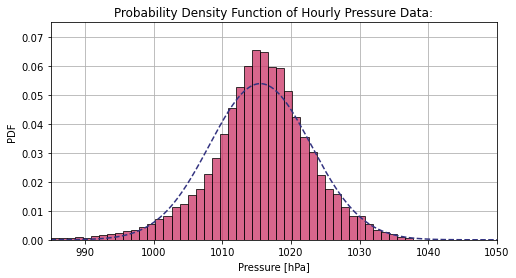

In [18]:
# now need to plot an approximate PDF for both data sets:

# for hourly data:

ff = plt.figure()
ff.set_figwidth(8)
ff.set_figheight(4)
plt.hist(uvic_hp, 50, density=True, facecolor=[0.8,0.2,0.4], alpha=0.75, edgecolor='k')
plt.xlabel(r'Pressure [hPa]')
plt.ylabel('PDF')
plt.title('Probability Density Function of Hourly Pressure Data:')
plt.xlim(985, 1050)
plt.ylim(0, 0.075)
plt.grid(which='both')
# normal distribution fit:
(mu, sigma) = norm.fit(uvic_hp)
xx = np.linspace(900, 1300, len(uvic_hp))
plt.plot(xx, norm.pdf(xx, mu, sigma), "--", color=[0.2,0.2,0.5])
plt.show()


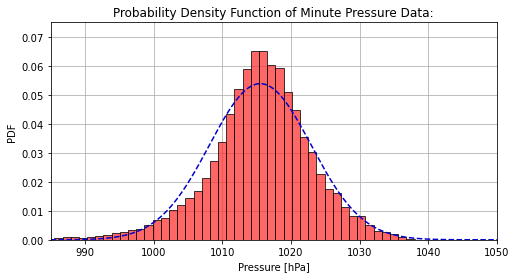

In [19]:
# for minutely data:

ff = plt.figure()
ff.set_figwidth(8)
ff.set_figheight(4)
plt.hist(uvic_mp, 50, density=True, facecolor=[1,0.2,0.2], alpha=0.75, edgecolor='k')
plt.xlabel(r'Pressure [hPa]')
plt.ylabel('PDF')
plt.title('Probability Density Function of Minute Pressure Data:')
plt.xlim(985, 1050)
plt.ylim(0, 0.075)
plt.grid(which='both')
# normal distribution fit:
(mu, sigma) = norm.fit(uvic_mp)
xx = np.linspace(900, 1300, len(uvic_mp))
plt.plot(xx, norm.pdf(xx, mu, sigma), "--", color=[0,0,0.8])
plt.show()

The above plots look almost identical to each other. This is as expected since the means and the standard deviations calculated previously were very similar. Both of these distributions are even more focussed around the mean value when compared to the fitted normal distributions.